# Une dos archivos en un dataframe, esolmet y ruoa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tools.importaciones import importa_excel
import glob as glob
import missingno as msno

In [2]:
f = "../data/001_raw/2018-2019-VIENTO-TMIX-RUOA.txt"
ruoa = pd.read_csv(f,
                   usecols=["TIMESTAMP","WSpeed_Avg","WDir_Avg"],
                   # usecols=["WDir_Avg","WSpeed_Avg"],
                   # usecols=[0,4,5],
                   skiprows=[0,2,3],
                   encoding="ANSI",
                   delimiter="\t",
                   index_col=0,
                   parse_dates=True,
                   dayfirst=True,
                  )
ruoa = ruoa.resample("10Min").mean()
ruoa = ruoa[ruoa.index.year == 2018]
ruoa.index.duplicated()

array([False, False, False, ..., False, False, False], shape=(52560,))

In [3]:
ruoa[ruoa.index.duplicated()]

,WSpeed_Avg,WDir_Avg
TIMESTAMP,,


In [4]:
files = glob.glob("../data/001_raw/*.xls")

esolmet = pd.concat([importa_excel(file) for file in files])
esolmet = esolmet[esolmet.index.year == 2018]
del  esolmet["Viento Vel."]
esolmet = esolmet.resample("10Min").mean()

In [5]:
esolmet.loc["2018-02-01"]

,Directa,Global,Difusa,UV,Temperatura,Humedad,Presiòn Bar.
Fecha,,,,,,,
2018-02-01 00:00:00,0.003,0.0,0.0,0.001,15.38,53.71,878.2341
2018-02-01 00:10:00,0.313,0.0,0.0,0.001,15.71,50.03,878.1605
2018-02-01 00:20:00,0.029,0.0,0.0,0.001,15.57,51.52,877.9796
2018-02-01 00:30:00,0.013,0.0,0.0,0.001,15.23,52.00,877.9725
2018-02-01 00:40:00,0.001,0.0,0.0,0.001,15.28,51.80,878.0463
...,...,...,...,...,...,...,...
2018-02-01 23:10:00,0.113,0.0,0.0,0.001,19.11,41.47,878.6667
2018-02-01 23:20:00,0.248,0.0,0.0,0.001,19.57,41.13,878.7175
2018-02-01 23:30:00,0.034,0.0,0.0,0.001,19.59,41.47,878.7158


In [6]:
esolmet[esolmet.index.duplicated()].index

DatetimeIndex([], dtype='datetime64[ns]', name='Fecha', freq='10min')

In [7]:
data = pd.concat([ruoa,esolmet],axis=1)
data

,WSpeed_Avg,WDir_Avg,Directa,Global,Difusa,UV,Temperatura,Humedad,Presiòn Bar.
2018-01-01 00:00:00,1.1817,300.1500,0.057,0.0,0.0,0.001,18.93,41.57,879.0692
2018-01-01 00:10:00,1.2568,306.2400,0.002,0.0,0.0,0.001,18.76,41.00,879.4363
2018-01-01 00:20:00,1.6964,348.8100,0.170,0.0,0.0,0.001,18.92,40.96,879.5181
2018-01-01 00:30:00,2.2944,348.3400,0.371,0.0,0.0,0.001,18.52,42.46,879.5826
2018-01-01 00:40:00,1.6643,210.8732,0.305,0.0,0.0,0.001,18.49,42.43,879.6826
...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,1.5977,331.0400,0.125,0.0,0.0,0.000,18.88,59.60,875.5595
2018-12-31 23:20:00,2.3029,323.7000,0.000,0.0,0.0,0.000,18.71,59.67,875.5595
2018-12-31 23:30:00,2.0789,186.7430,0.044,0.0,0.0,0.000,18.52,58.75,875.2889
2018-12-31 23:40:00,0.8253,80.1400,0.170,0.0,0.0,0.000,18.36,60.62,875.0606


In [8]:
data.to_csv("../data/002_processed/esolmet_ruoaWSWD_2018.parquet")

<Axes: >

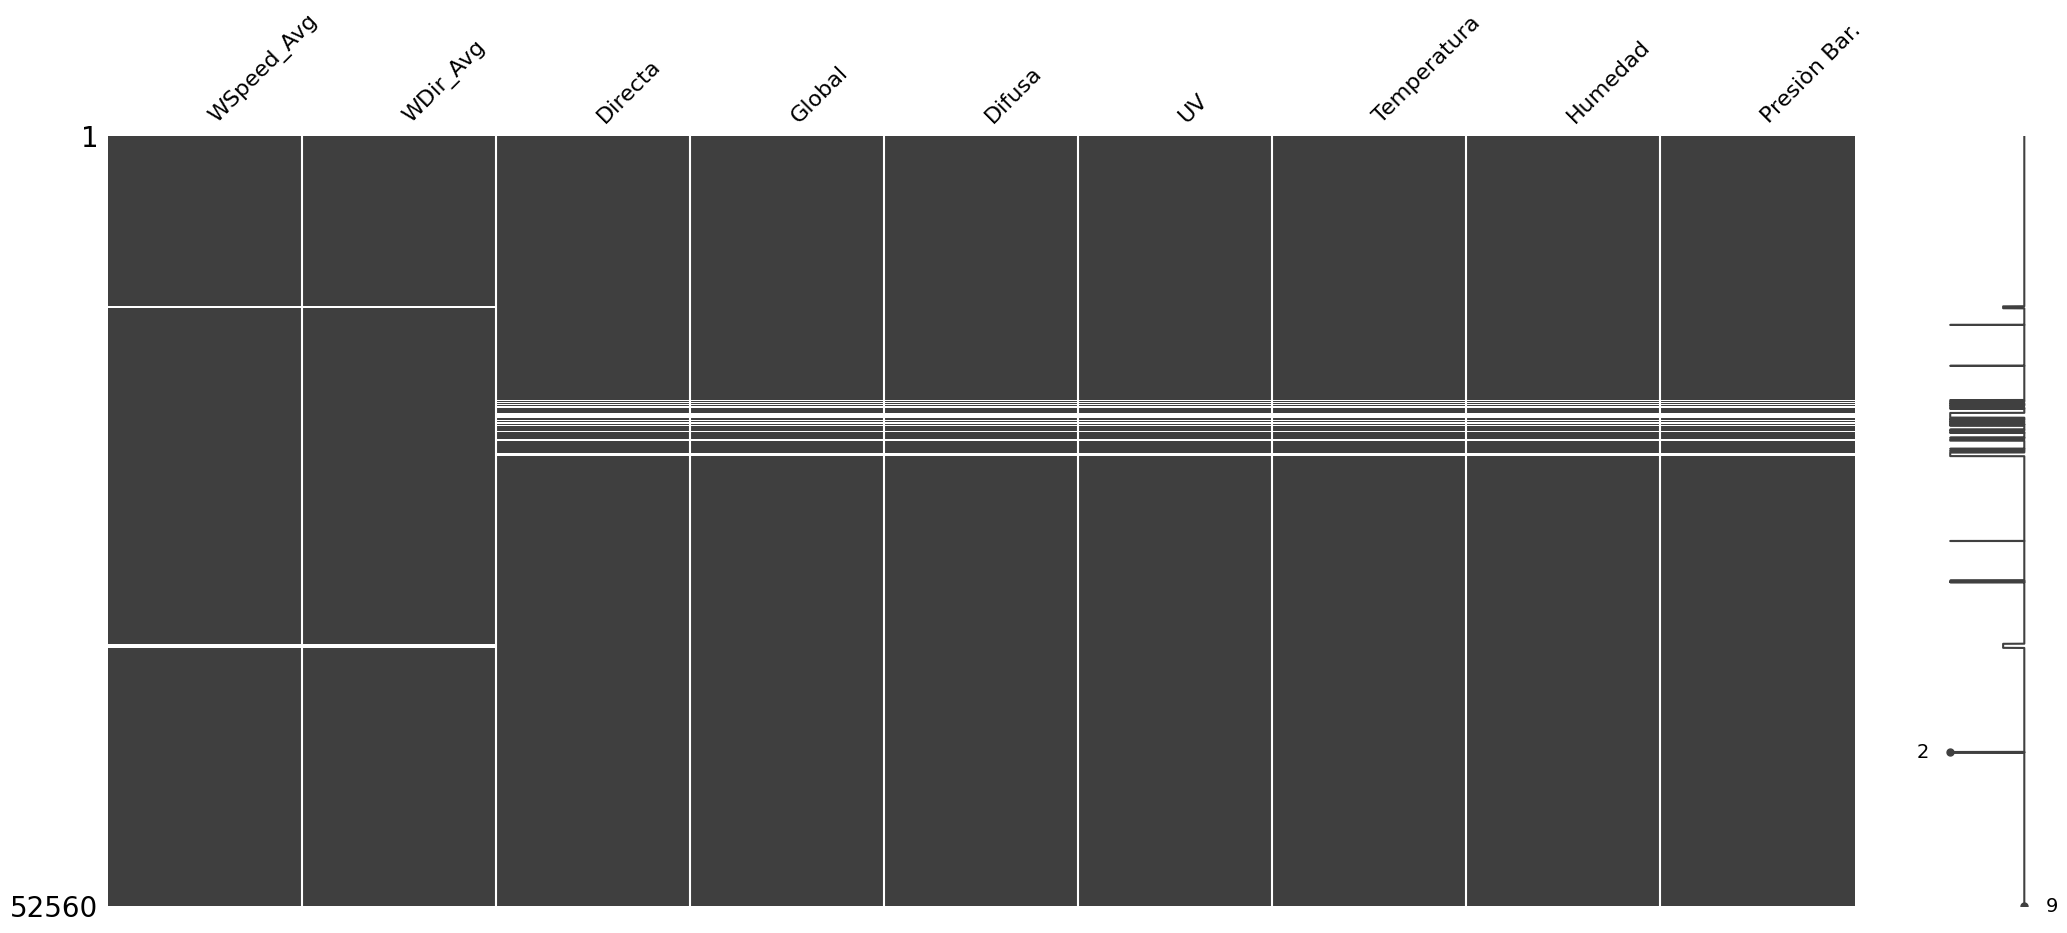

In [9]:
msno.matrix(data)